In [1]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
import pandas as pd
import random
from spiro.models import *
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import spiro.data_preprocessing

random.seed(0)
np.random.seed(0)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from tueplots import bundles
import numpy as np

In [3]:
data = pd.read_csv("../data/feature_30_joint_51.csv")
data= data[~data.iloc[:,0].isin([21,48])].reset_index(drop=True)
data.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
labels = pd.read_csv("../data/labels.csv")

In [5]:
final_data= pd.DataFrame(data)

In [6]:
X1 = final_data.astype(float)
X1 = MinMaxScaler().fit_transform(np.array(X1))
X1 = pd.DataFrame(X1)
y = labels.iloc[:,-1].astype(float)

#For FEV1 
# y= labels.iloc[:,-2].astype(float)

### FVC

In [7]:
#For FVC
y = labels.iloc[:,-1].astype(float)

committee_list = [
    GradientBoostingRegressor(loss="absolute_error", random_state=108),
    RandomForestRegressor(random_state=108),
    DecisionTreeRegressor(random_state=108)
]
models = [RandomForestRegressor(random_state=42), DecisionTreeRegressor(random_state=42), GradientBoostingRegressor(random_state=42), CommitteeRegressor(committee_list)]
model_names = ["Random Forest", "Gradient Boosting", "Decision Tree", "Committee Regressor"]
mape_dict = {}
loo = LeaveOneOut()
tot = len(X1)

for j, model in enumerate(models):
    prog        = 0
    y_GT        = []
    y_PT        = []
    abserror    = []
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
    print("{0} Regressor for FVC with {1} features".format(model_names[j],30))
    # For every split obtained by Leave_One_Out split function.
    for i,(train_index, test_index) in enumerate(loo.split(X1)):
        
        # To show some sort of progress.
        prog = prog + 1
        print("Progress : {0}/{1}".format(prog,tot),end = '\r')

        # Test-train split for the fold.
        X_Train, X_Test = X1.iloc[train_index],X1.iloc[test_index]
        y_Train, y_Test = y.iloc[train_index],y.iloc[test_index]
        
        # Training new Random Forest ensemble.
        model.fit(X_Train, y_Train)
        pred = model.predict(X_Test)  

        # print("Ground Truth : {0}".format(np.array(y_Test)[0]))
        # Storing the values of Ground truth and Predicted value for future use.
        # print(np.array(y_Test)[0])
        y_GT.append(np.array(y_Test)[0])
        y_PT.append(pred[0]) 


    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
    print("{0} metrics : ".format(model_names[j]))
    mape = 100 * mean_absolute_percentage_error(y_GT,y_PT)
    print("\tMean Absolute Percentage Error : " , mape)
    mape_dict[model_names[j]] = mape
    print("\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
    print("\tMean Square Error : " , mean_squared_error(y_GT,y_PT,squared=False))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

print(mape_dict)

with open('../results/figure6/fvc/mape_dict.pkl', 'wb') as f:
    pickle.dump(mape_dict, f)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Random Forest Regressor for FVC with 30 features
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random Forest metrics : 
	Mean Absolute Percentage Error :  4.580250399527127
	Mean Aabsolute Error :  0.15071764705882332
	Mean Square Error :  0.1915421215130638
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Gradient Boosting Regressor for FVC with 30 features
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Gradient Boosting metrics : 
	Mean Absolute Percentage Error :  5.145846078816129
	Mean Aabsolute Error :  0.17215686274509806
	Mean Square Error :  0.2534468270025235
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Decision Tree Regressor for FVC with 30 features
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Decision Tree metrics : 
	Mean Absolute Percentage Error :  4.2929844715344885
	Mean Aabso

### FEV1

In [8]:
#For FEV1 
y= labels.iloc[:,-2].astype(float)

committee_list = [
    GradientBoostingRegressor(loss="absolute_error", random_state=0),
    RandomForestRegressor(random_state=0),
    DecisionTreeRegressor(random_state=0)
]
models = [RandomForestRegressor(random_state=42), DecisionTreeRegressor(random_state=42), GradientBoostingRegressor(random_state=42), CommitteeRegressor(committee_list)]
model_names = ["Random Forest", "Gradient Boosting", "Decision Tree", "Committee Regressor"]
mape_dict = {}

for j, model in enumerate(models):
    prog        = 0
    y_GT        = []
    y_PT        = []
    abserror    = []
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
    print("{0} Regressor for FEV1 with {1} features".format(model_names[j],30))
    # For every split obtained by Leave_One_Out split function.
    for i,(train_index, test_index) in enumerate(loo.split(X1)):
        
        # To show some sort of progress.
        prog = prog + 1
        print("Progress : {0}/{1}".format(prog,tot),end = '\r')

        # Test-train split for the fold.
        X_Train, X_Test = X1.iloc[train_index],X1.iloc[test_index]
        y_Train, y_Test = y.iloc[train_index],y.iloc[test_index]
        
        # Training new Random Forest ensemble.
        model.fit(X_Train, y_Train)
        pred = model.predict(X_Test)  

        # print("Ground Truth : {0}".format(np.array(y_Test)[0]))
        # Storing the values of Ground truth and Predicted value for future use.
        # print(np.array(y_Test)[0])
        y_GT.append(np.array(y_Test)[0])
        y_PT.append(pred[0]) 


    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
    print("{0} metrics : ".format(model_names[j]))
    mape = 100 * mean_absolute_percentage_error(y_GT,y_PT)
    print("\tMean Absolute Percentage Error : " , mape)
    mape_dict[model_names[j]] = mape
    print("\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
    print("\tMean Square Error : " , mean_squared_error(y_GT,y_PT,squared=False))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

print(mape_dict)

with open('../results/figure6/fev1/mape_dict.pkl', 'wb') as f:
    pickle.dump(mape_dict, f)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Random Forest Regressor for FEV1 with 30 features
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random Forest metrics : 
	Mean Absolute Percentage Error :  5.288223489526106
	Mean Aabsolute Error :  0.15850392156862736
	Mean Square Error :  0.2104297176694189
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Gradient Boosting Regressor for FEV1 with 30 features
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Gradient Boosting metrics : 
	Mean Absolute Percentage Error :  6.412435252754866
	Mean Aabsolute Error :  0.1894117647058824
	Mean Square Error :  0.2509042470275675
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Decision Tree Regressor for FEV1 with 30 features
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Decision Tree metrics : 
	Mean Absolute Percentage Error :  5.0945217378412
	Mean Aabsol

In [9]:
# load data
with open('../results/figure6/fvc/mape_dict.pkl', 'rb') as f:
    fvc_values = pickle.load(f)

with open('../results/figure6/fev1/mape_dict.pkl', 'rb') as f:
    fev_values = pickle.load(f)

In [10]:
fvc_values = [round(value, 2) for value in fvc_values.values()]
fev_values = [round(value, 2) for value in fev_values.values()]

In [11]:
# fvc_values

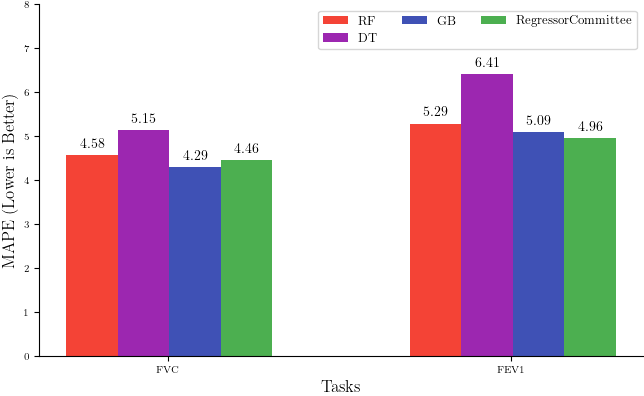

In [12]:
#Without Demographics
plt.rcParams.update(bundles.tmlr2023())

# legend_labels = ['RF','DT','GB','MLP', 'RegressorCommittee']
legend_labels = ['RF','DT','GB','RegressorCommittee']

# colors = ["#f44336","#9c27b0","#3f51b5","#2196f3","#4caf50"]
colors = ["#f44336","#9c27b0","#3f51b5","#4caf50"]

plt.rcParams['axes.labelsize']=12
plt.rcParams['legend.fontsize']=9
fig = plt.figure()
ax = fig.gca()
# Define the data
labels = ['FVC','FEV1']
data = [fvc_values,fev_values]
bar_width = 0.15
x = np.arange(len(labels))

for m,i in enumerate(zip(legend_labels,colors)):
    rects = ax.bar(x + m*bar_width, [d[m] for d in data], bar_width, label=i[0],color=i[1])

for bar in ax.patches:
    cy = bar.get_y() + bar.get_height() + 0.25
    cx = bar.get_x() + bar.get_width() / 2
    ax.text(
        cx,
        cy,
        f"{bar.get_height():.2f}",
        rotation=0,
        color="black",
        fontsize=10,
        ha="center",
        va="center",
        zorder=2,
        weight="bold",
    )
# Add labels and title

x = np.arange(2)
plt.xlabel('Tasks')
# plt.axhline(y=7, color='r', linestyle='--',label='7% ATS Line')
plt.ylabel('MAPE (Lower is Better)')
plt.xticks(x+0.22, ['FVC','FEV1'])
plt.legend(ncol=3)

plt.ylim(0,8)
# savefig("loocv_results.pdf")
sns.despine()

plt.savefig('../figures/loocv.pdf', format='pdf')

plt.show()